SnowCV method to quantify snow height from phenocam staff gauge imagery.
For NEON Battelle
Donal O'Leary
April 12 2021

Borrowing liberally from <a href="https://www.pyimagesearch.com/2017/07/17/credit-card-ocr-with-opencv-and-python/" target="_blank">this awesome tutorial by Adrian Rosebrock</a>.

In [25]:
import cv2
import imutils
from imutils import contours
import argparse
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [26]:
# # construct the argument parser and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--image", required=True,
# 	help="path to input image")
# ap.add_argument("-r", "--reference", required=True,
# 	help="path to reference OCR-A image")
# args = vars(ap.parse_args())

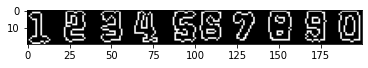

In [32]:
template = cv2.imread('/Users/olearyd/Git/SnowCV/data/number_template.png')
template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
#template = cv2.threshold(template, 30, 255, cv2.THRESH_BINARY)[1]

template = cv2.resize(template, (200,20))
template = cv2.Canny(template , 10, 255)

template.shape
plt.imshow(template, cmap='gray')

In [33]:
templateCnts = cv2.findContours(template.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
templateCnts = imutils.grab_contours(templateCnts)
templateCnts = contours.sort_contours(templateCnts, method="left-to-right")[0]

templateCnts


(array([[[ 3,  1]],
 
        [[ 1,  3]],
 
        [[ 3,  5]],
 
        [[ 4,  5]],
 
        [[ 5,  6]],
 
        [[ 5, 14]],
 
        [[ 4, 15]],
 
        [[ 3, 15]],
 
        [[ 1, 17]],
 
        [[ 3, 19]],
 
        [[ 7, 19]],
 
        [[ 8, 18]],
 
        [[ 9, 18]],
 
        [[10, 19]],
 
        [[11, 18]],
 
        [[12, 18]],
 
        [[13, 17]],
 
        [[11, 15]],
 
        [[ 9, 15]],
 
        [[ 8, 14]],
 
        [[ 8,  2]],
 
        [[ 7,  1]]], dtype=int32),
 array([[[24,  0]],
 
        [[23,  1]],
 
        [[23,  9]],
 
        [[22, 10]],
 
        [[22, 15]],
 
        [[23, 16]],
 
        [[23, 17]],
 
        [[24, 17]],
 
        [[25, 18]],
 
        [[26, 18]],
 
        [[27, 17]],
 
        [[33, 17]],
 
        [[34, 16]],
 
        [[33, 15]],
 
        [[33, 14]],
 
        [[27, 14]],
 
        [[26, 13]],
 
        [[26, 12]],
 
        [[27, 11]],
 
        [[33, 11]],
 
        [[33, 10]],
 
        [[34,  9]],
 
        [[34,  7]],

In [17]:
digits = {}

for (i, c) in enumerate(templateCnts):
	# compute the bounding box for the digit, extract it, and resize
	# it to a fixed size
	(x, y, w, h) = cv2.boundingRect(c)
	roi = ref[y:y + h, x:x + w]
	roi = cv2.resize(roi, (57, 88))
	# update the digits dictionary, mapping the digit name to the ROI
	digits[i] = roi

In [18]:
digits

{0: array([[255, 255, 255, ..., 255, 255, 180],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 139],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)}

In [4]:
ref = cv2.imread('/Users/olearyd/Git/SnowCV/data/NEON.D13.NIWO.DP1.00042_2020_01_10_101505.jpg')
ref = cv2.cvtColor(ref, cv2.COLOR_BGR2GRAY)
ref = cv2.threshold(ref, 30, 255, cv2.THRESH_BINARY)[1]
ref

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [5]:
ref.shape

(960, 1296)

In [6]:
ROI = ref[600:850,870:920]

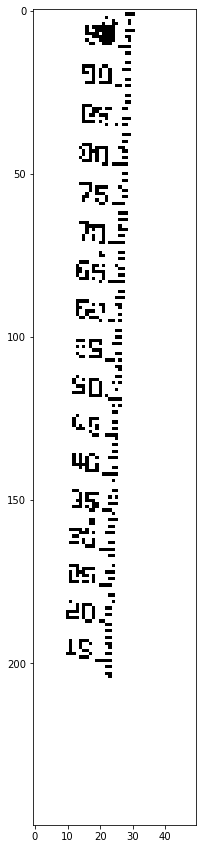

In [7]:
plt.rcParams['figure.figsize'] = [5, 15]
plt.imshow(ROI,cmap='gray')

In [8]:
## Plot image in external window
cv2.imshow('image',ref)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

In [9]:
fifteen = ROI[190:200,8:19]
x=fifteen

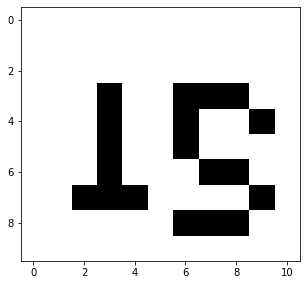

In [10]:
plt.imshow(fifteen,cmap='gray')

In [11]:
x

array([[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255,   0, 255, 255,   0,   0,   0, 255, 255],
       [255, 255, 255,   0, 255, 255,   0, 255, 255,   0, 255],
       [255, 255, 255,   0, 255, 255,   0, 255, 255, 255, 255],
       [255, 255, 255,   0, 255, 255, 255,   0,   0, 255, 255],
       [255, 255,   0,   0,   0, 255, 255, 255, 255,   0, 255],
       [255, 255, 255, 255, 255, 255,   0,   0,   0, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255]],
      dtype=uint8)

In [12]:
scores = []

result = cv2.matchTemplate

result = cv2.matchTemplate(roi, digitROI,cv2.TM_CCOEFF)

# for (digit, digitROI) in digits.items():
# 			# apply correlation-based template matching, take the
# 			# score, and update the scores list
# 			result = cv2.matchTemplate(roi, digitROI,
# 				cv2.TM_CCOEFF)
# 			(_, score, _, _) = cv2.minMaxLoc(result)
# 			scores.append(score)
#         # the classification for the digit ROI will be the reference
# 		# digit name with the *largest* template matching score
# 		groupOutput.append(str(np.argmax(scores)))

NameError: name 'roi' is not defined

In [ ]:
for c in digitCnts:
		# compute the bounding box of the individual digit, extract
		# the digit, and resize it to have the same fixed size as
		# the reference OCR-A images
		roi = cv2.resize(roi, (57, 88))
		# initialize a list of template matching scores	
		scores = []
		# loop over the reference digit name and digit ROI
		for (digit, digitROI) in digits.items():
			# apply correlation-based template matching, take the
			# score, and update the scores list
			result = cv2.matchTemplate(roi, digitROI,
				cv2.TM_CCOEFF)
			(_, score, _, _) = cv2.minMaxLoc(result)
			scores.append(score)
        # the classification for the digit ROI will be the reference
		# digit name with the *largest* template matching score
		groupOutput.append(str(np.argmax(scores)))